In [2]:
from ase.io import read

In [2]:
at = read('sample/CONTCAR')

In [2]:
from ase.visualize.plot import plot_atoms

<Axes: >

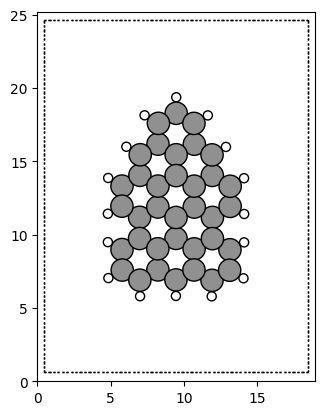

In [5]:
plot_atoms(at)

In [106]:
sample = read('sample/CONTCAR')

In [2]:
import numpy as np
import sys
sys.path.append('/home/jtrujillo/DBSPM')
from pydbspm.SPMGrid import SPMGrid

from pydbspm.grid import Grid

/home/jtrujillo/.conda/envs/pyFDBMenv/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jtrujillo/.conda/envs/pyFDBMenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [23]:
#import sys
sys.path.append('/home/jtrujillo/pyFDBM')
from pyFDBM.postprocessing import AFMGrid

In [9]:
sys.path

['/home/jtrujillo/DBSPM/triangulene',
 '/home/jtrujillo/.conda/envs/pyFDBMenv/lib/python39.zip',
 '/home/jtrujillo/.conda/envs/pyFDBMenv/lib/python3.9',
 '/home/jtrujillo/.conda/envs/pyFDBMenv/lib/python3.9/lib-dynload',
 '',
 '/home/jtrujillo/.local/lib/python3.9/site-packages',
 '/home/jtrujillo/.conda/envs/pyFDBMenv/lib/python3.9/site-packages',
 '/home/jtrujillo/.conda/envs/pyFDBMenv/lib/python3.9/site-packages/IPython/extensions',
 '/home/jtrujillo/.ipython',
 '/home/jtrujillo/DBSPM']

In [7]:
vdw = SPMGrid("triangulene_vdw.npz","vdw").get_gradient()
es = SPMGrid("triangulene_es.npz","es").get_gradient()
sr = SPMGrid("triangulene_sr_a1.08.npz","sr").get_gradient()
st = vdw + es + 42.91*sr

In [8]:
rel = np.load("relax_triangulene_k0.2000_a1.08_V42.91.npz")

In [9]:
relax = SPMGrid("relax_triangulene_k0.2000_a1.08_V42.91.npz","E").get_gradient()

<Axes: >

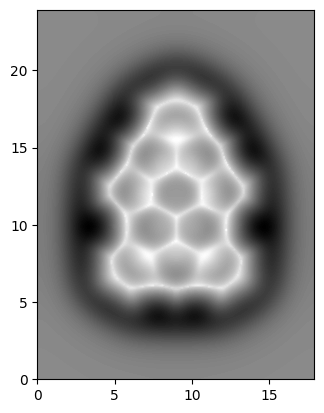

In [17]:
relax.plot(3.2,cmap='gray')

In [10]:
from vaspwfc import vaspwfc

In [23]:
wfc = vaspwfc('SPIN/WAVECAR')

In [24]:
wfc.wfc_r(1,1,1).shape

(122, 162, 122)

In [3]:
from scipy.ndimage import gaussian_filter

In [6]:
stm = np.load('stm_triangulene_V1.5.npz')
stm_s = AFMGrid(stm['s'],'sp',atoms=read('sample/CONTCAR'),grid_from_atoms=True)
stm_p = AFMGrid(gaussian_filter(stm['p'],sigma=2,mode='wrap'),'sp',atoms=read('sample/CONTCAR'),grid_from_atoms=True)

In [7]:
atoms=read('sample/CONTCAR')

In [15]:
grid = Grid(stm['s'].shape,cell=atoms.cell,atoms=atoms,zref=None)

In [16]:

from ase.geometry import get_layers

In [18]:

il, _ = get_layers(atoms, (0, 0, 1), tolerance=0.1)
zref = np.round(atoms.positions[il == il.max(), 2].mean(), 4)

In [19]:
zref

2.9633

In [13]:
grid.zref

0.0

In [72]:
lvec = np.linalg.norm(atoms.cell,axis=1)
shape = stm['s'].shape
dr = lvec/shape

In [76]:
ij = np.indices(shape[:2], dtype=float).T
x, y = np.dot(ij / shape[:2], atoms.cell[:2, :2]).T

In [77]:
z = np.arange(shape[2]) * dr[2]

In [79]:
x_ = np.linalg.norm([x[:, 0], y[:, 0]], axis=0)
y_ = np.linalg.norm([x[0, :], y[0, :]], axis=0)

In [80]:
grid = [x_,y_,z]

In [105]:
len(stm_s.grid)

3

In [4]:
stm1 = np.load('stm_triangulene_V1.5.npz')
stm_s1 = SPMGrid(stm1['s'],'sp',atoms=read('sample/CONTCAR'),grid_from_atoms=True)
stm_p1 = SPMGrid(gaussian_filter(stm1['p'],sigma=2,mode='wrap'),'p',atoms=read('sample/CONTCAR'),grid_from_atoms=True)

In [5]:
stm_s1.zref 

2.9633

In [ ]:
= 2.9633
stm_s1.z -= 2.9633

In [22]:
stm1 = stm_s1 + stm_p1

<Axes: >

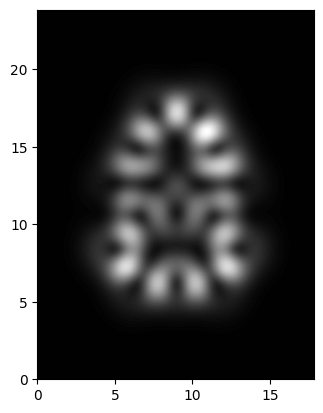

In [20]:
stm_p.plot(2.85,cmap='gray')

In [108]:
stm_s.zref

2.9633

<Axes: >

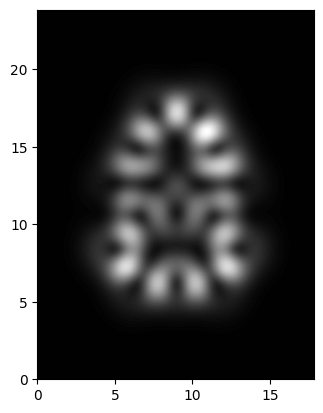

In [21]:
stm_p1.plot(2.85,cmap='gray')

In [28]:
import sys
sys.path.append('/home/jtrujillo/DBSPM/')
from pydbspm.calculators.vasp import get_stm
from pathlib import Path

ModuleNotFoundError: No module named 'pydbspm.calculators'

In [ ]:
wd = Path('SPIN')
gridsp, atoms,s,p = get_stm(bias=1.5,directory=wd)

<Axes: >

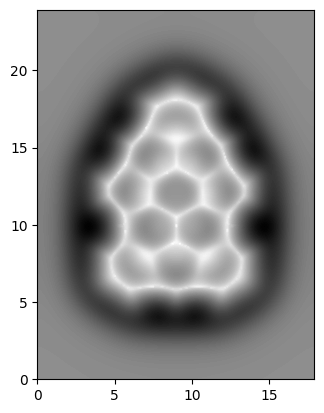

In [3]:
relax.plot(3.2,cmap='gray')

In [4]:
import numpy as np

In [32]:
stm = np.load('SPIN/stm_both_V1.500.npz')

In [6]:
from ase.io import read

In [9]:
stm = np.load('SPIN/stm_both_V1.500.npz')
stm_s = AFMGrid(stm['s'],'sp',atoms=read('sample/CONTCAR'),grid_from_atoms=True)
stm_p = AFMGrid(gaussian_filter(stm['p'],sigma=2,mode='wrap'),'sp',atoms=read('sample/CONTCAR'),grid_from_atoms=True)
stm = stm_s + stm_p

<Axes: >

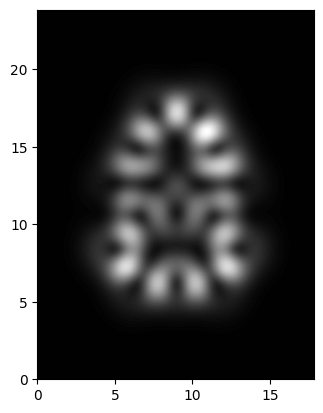

In [38]:
stm_p.plot(2.85,cmap='gray')

In [10]:
from scipy.ndimage import gaussian_filter

In [12]:
rel = np.load('relax_triangulene_k0.2000_a1.08_V42.91.npz')

In [13]:
rel

NpzFile 'relax_triangulene_k0.2000_a1.08_V42.91.npz' with keys: E, shape, span, origin, ortho...

In [24]:
relax = AFMGrid('/home/jtrujillo/triangulene/ETRI1H/relax_Triangulene_k0.2000_a1.08_V42.91.npz','E')

In [25]:
relax.set_tip(np.load('/home/jtrujillo/triangulene/ETRI1H/relax_Triangulene_k0.2000_a1.08_V42.91.npz')['tip'])

In [26]:
tip = np.load('/home/jtrujillo/triangulene/ETRI1H/relax_Triangulene_k0.2000_a1.08_V42.91.npz')['tip']

In [27]:
tip.shape

(3, 240, 320, 33)

In [18]:
brstm = relax.interpolate_data(stm)

<Axes: >

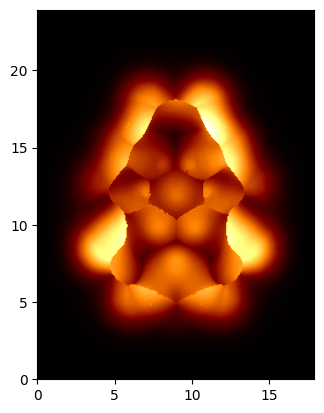

In [19]:
brstm.plot(3., cmap='afmhot')

In [22]:
print(brstm)

AFMGrid(Label: E, z-min: 2.4921, z-max: 4.8921, dz: 0.0750, zref: 2.9829, min. value: 1.61e-11, max. value: 2.69e-07)


In [ ]:
np.savez('')

In [3]:

from pydbspm.grid import  get_grid_from_params

from pydbspm.input_parser import parse_params, default_params
params = parse_params('input.in')

In [4]:

from pydbspm.calculate import DensityCalculator
denscalc = DensityCalculator(params)
denscalc.load_sample('sample/sample.npz')
gridS = denscalc.gridS


In [5]:
relax_grid, rlx_idx, nbox = get_grid_from_params(
            params,
            gridS,
            nidx=True,
            nbox=True,
            numbers=gridS.numbers,
            positions=gridS.positions,
        )

In [7]:
relax_grid.tip = np.load('relax_triangulene_k0.2000_a1.08_V42.91.npz')['tip']

KeyError: 'tip is not a file in the archive'

In [18]:
rel = np.load('relax_triangulene_k0.2000_a1.08_V42.91.npz')

In [19]:
rel

NpzFile 'relax_triangulene_k0.2000_a1.08_V42.91.npz' with keys: E, shape, span, origin, ortho...